In [1]:
import sys
import os
from pathlib import Path
wd = Path().cwd() # working directory
sys.path.insert(1, wd.__str__())

from main.pre_process import combine_tiff
from main.custom_filters import *
from main.quick_deepinterp import *

from ScanImageTiffReader import ScanImageTiffReader
import numpy as np

In [2]:
fld = 'E:\\Code\\EMBRIO_workshop_Caimage\\deepinterpolation_denoise\\demo_dataset'
preflix = 'S1ROI1_10.5x_'

In [3]:
combine_tiff(fld, preflix, if_combine = 1)
generator_param = quick_finetuning(fld)
quick_inference(fld, generator_param)

loading files
processing
saving files


INFO:FineTuning:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\model_folder\2023_06_26_17_15_training_full_args.json
INFO:FineTuning:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\model_folder\2023_06_26_17_15_finetuning.json
INFO:FineTuning:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\model_folder\2023_06_26_17_15_generator.json
INFO:FineTuning:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\model_folder\2023_06_26_17_15_test_generator.json


Starting fine-tuning


100/100 [==============================] - 29s 280ms/step - loss: 0.1298


INFO:FineTuning:created objects for training
INFO:FineTuning:fine tuning job finished - finalizing output model
INFO:root:randomize should be set to False for inference.                         Overriding the parameter
INFO:Inference:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\denoise\inference_full_args.json
INFO:Inference:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\denoise\2023_06_26_17_15_inference.json
INFO:Inference:wrote E:\Code\EMBRIO_workshop_Caimage\deepinterpolation_denoise\demo_dataset\denoise\2023_06_26_17_15_generator.json


Loss data was not present
Val. loss data was not present
Saved model to disk
Fine-tuning finished
Preparing data for inference file 0
Starting inference for file 0


ValueError: Unknown optimizer: Custom>RMSprop

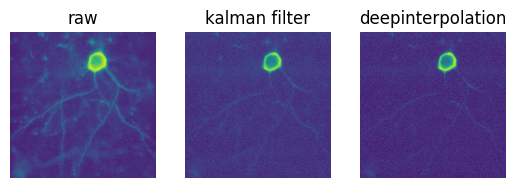

In [18]:
# for demo only, plot the std projection before and after denoise
orig_files = glob.glob(os.path.join(fld,preflix + '*.tif'))
all_m = []
for k, file in enumerate(orig_files):
# m = cm.load_movie_chain(files)
    all_m.append(ScanImageTiffReader(file).data())
m = np.concatenate(all_m, axis = 0)
filt_files = glob.glob(os.path.join(fld, "pre",'*.tif'))
m_filt = ScanImageTiffReader(filt_files[0]).data()
denoise_files = glob.glob(os.path.join(fld, "final",'*.tif'))
m_denoise = ScanImageTiffReader(denoise_files[0]).data()
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3)
axs[0].imshow(m.std(axis = 0))
axs[0].set_title("raw")
axs[1].imshow(m_filt.std(axis = 0))
axs[1].set_title("kalman filter")
axs[2].imshow(m_denoise.std(axis = 0))
axs[2].set_title("deepinterpolation")
for ax in axs:
    ax.axis("off")